In [1]:
import pandas as pd
from numpy import log10
# type and subtype are always the same so we can drop them
df = pd.read_csv('/kaggle/input/executive-orders/documents_of_type_presidential_document_and_of_presidential_document_type_executive_order.csv',
                parse_dates=['publication_date', 'signing_date']).drop(columns=['type', 'subtype'])
df['length'] = df['end_page'] - df['start_page']
df['log10_length'] = log10(1 + df['length'])
df.head()

,citation,document_number,end_page,html_url,pdf_url,publication_date,signing_date,start_page,title,disposition_notes,executive_order_number,length,log10_length
0,88 FR 55905,2023-17832,55907,https://www.federalregister.gov/documents/2023...,https://www.govinfo.gov/content/pkg/FR-2023-08...,2023-08-17,2023-08-14,55905,United States Coast Guard Officer Personnel Ma...,NaN,14106,2,0.477121
1,88 FR 54867,2023-17449,54872,https://www.federalregister.gov/documents/2023...,https://www.govinfo.gov/content/pkg/FR-2023-08...,2023-08-11,2023-08-09,54867,Addressing United States Investments in Certai...,NaN,14105,5,0.778151
2,88 FR 50535,2023-16570,50757,https://www.federalregister.gov/documents/2023...,https://www.govinfo.gov/content/pkg/FR-2023-08...,2023-08-02,2023-07-28,50535,2023 Amendments to the Manual for Courts-Marti...,NaN,14103,222,2.348305
3,88 FR 51203,2023-16636,51208,https://www.federalregister.gov/documents/2023...,https://www.govinfo.gov/content/pkg/FR-2023-08...,2023-08-02,2023-07-28,51203,Federal Research and Development in Support of...,NaN,14104,5,0.778151
4,88 FR 45807,2023-15347,45807,https://www.federalregister.gov/documents/2023...,https://www.govinfo.gov/content/pkg/FR-2023-07...,2023-07-18,2023-07-13,45807,Ordering the Selected Reserve and Certain Memb...,NaN,14102,0,0.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   citation                1000 non-null   object        
 1   document_number         1000 non-null   object        
 2   end_page                1000 non-null   int64         
 3   html_url                1000 non-null   object        
 4   pdf_url                 1000 non-null   object        
 5   publication_date        1000 non-null   datetime64[ns]
 6   signing_date            1000 non-null   datetime64[ns]
 7   start_page              1000 non-null   int64         
 8   title                   1000 non-null   object        
 9   disposition_notes       717 non-null    object        
 10  executive_order_number  1000 non-null   int64         
 11  length                  1000 non-null   int64         
 12  log10_length            1000 non-null   float64  

In [3]:
df.nunique()

citation                  1000
document_number           1000
end_page                   996
html_url                  1000
pdf_url                   1000
publication_date           832
signing_date               827
start_page                 993
title                      923
disposition_notes          649
executive_order_number    1000
length                      30
log10_length                30
dtype: int64

<Axes: ylabel='Frequency'>

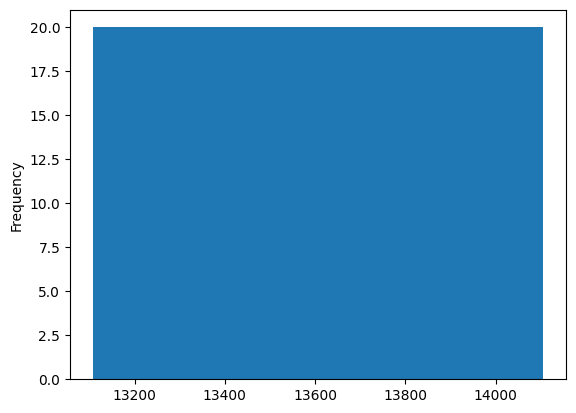

In [4]:
df['executive_order_number'].plot.hist(bins=50)

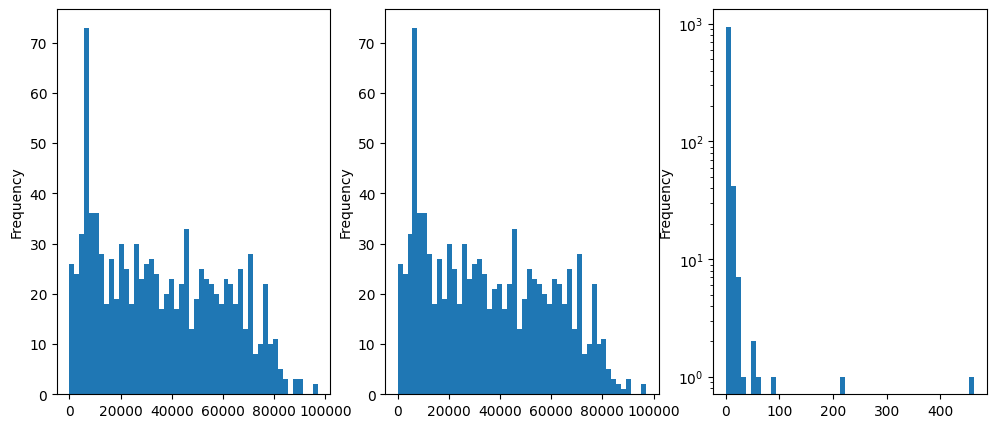

In [5]:
from matplotlib.pyplot import subplots
_, ax = subplots(figsize=(12, 5), ncols=3)
for index, column in enumerate(['start_page', 'end_page', 'length']):
    df[column].plot.hist(ax=ax[index], bins=50, log=(index > 1))

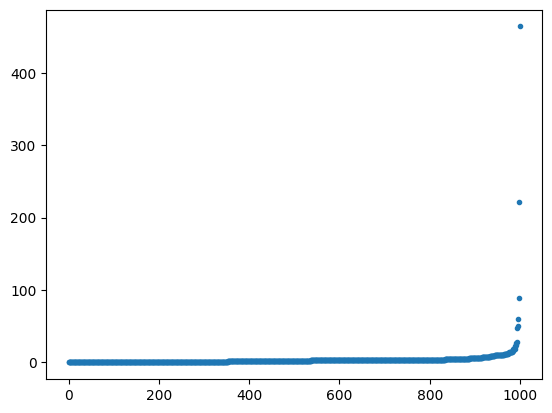

In [6]:
from matplotlib.pyplot import plot
plot(sorted(df['length'].values), linestyle='None', marker='.')

In [7]:
from plotly.express import scatter
scatter(data_frame=df, x='start_page', y='executive_order_number', color='log10_length', hover_name='title',
       hover_data=['citation', 	'document_number', 'length']).show()